<a href="https://colab.research.google.com/github/svetlanama/math/blob/main/%D0%94%D0%9710_%D0%9C%D0%BE%D1%96%D1%81%D0%B5%D1%94%D0%BD%D0%BA%D0%BE_%D0%A1%D0%B2%D1%96%D1%82%D0%BB%D0%B0%D0%BD%D0%B0_%D0%9E%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D1%96%D0%B2%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



# Шлях до файлу (залежить куди ти його поклав)
python_material_folder_name = "neo_data/House_Rent_Dataset.csv" #"Rent Data.csv"

# Check if in Google Colab environment
try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = rf"drive/MyDrive/{python_material_folder_name}"
        # If unsure, print current directory path by executing the following in a new cell:
        # !pwd
    IN_COLAB = True

    import os
    import sys

    # Get the current working directory (notebook's directory)
    notebook_dir = f"{path_python_material}/notebooks"
    print(notebook_dir)

    if notebook_dir not in sys.path:
      sys.path.append(notebook_dir)

except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    path_python_material = ".."

print("path_python_material:", path_python_material)


df = pd.read_csv(path_python_material)
display(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive/MyDrive/neo_data/House_Rent_Dataset.csv/notebooks
path_python_material: drive/MyDrive/neo_data/House_Rent_Dataset.csv


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Частина 1. Аналіз та підготовка даних

Проаналізуй діапазони значень, їх середні та дисперсію, розподіли, кореляції, наявність пропущених значень, типи ознак.
Перевір на наявність пропущених значень. За наявності заповни їх або видали рядки з пропусками.
За наявності бінарних ознак заміни значення цих ознак на 0 та 1.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Завантаження датасету ---
df = pd.read_csv(path_python_material)
print("✅ Форма датасету:", df.shape)
display(df.head())

# --- 2. Базова статистика ---
print("\n=== INFO ===")
print(df.info())

print("\n=== Описова статистика (числові колонки) ===")
display(df.describe().T)  # середні, std, min, max (діапазони видно)

# дисперсія для числових колонок
print("\n=== Дисперсія числових ознак ===")
display(df.var(numeric_only=True))




✅ Форма датасету: (4746, 12)


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner



=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None

=== Описова статистика (числові колонки) ===


,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0



=== Дисперсія числових ознак ===


,0
BHK,6.926499e-01
Rent,6.100612e+09
Size,4.022126e+05
Bathroom,7.823963e-01


In [33]:
# --- 3. Перевірка пропусків ---
na_tbl = (
    pd.DataFrame({
        "na_count": df.isna().sum(),
        "na_%": df.isna().mean()*100
    })
    .sort_values("na_count", ascending=False)
)
print("\n=== Пропущені значення ===")
display(na_tbl[na_tbl.na_count > 0])

# Заповнення: числові -> медіана, категоріальні -> мода
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        if df[col].isna().any():
            mode = df[col].mode(dropna=True)
            if len(mode) > 0:
                df[col] = df[col].fillna(mode.iloc[0])

print("✅ Пропуски заповнено")





=== Пропущені значення ===


,na_count,na_%


✅ Пропуски заповнено


In [34]:
# --- 4. Типи ознак ---
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols  = df.select_dtypes(include=["object"]).columns.tolist()

print("\nЧислові:", numeric_cols)
print("Категоріальні:", cat_cols)

# --- 5. Бінарні ознаки ---
binary_like_cols = []
for col in cat_cols:
    uniq = df[col].dropna().unique()
    if len(uniq) == 2:  # якщо рівно 2 значення
        binary_like_cols.append(col)

def make_binary_01(series: pd.Series):
    vals = sorted(series.dropna().unique(), key=lambda v: str(v))
    return series.map({vals[0]: 0, vals[1]: 1}).astype(int)

for col in binary_like_cols:
    df[col] = make_binary_01(df[col])

print("✅ Бінарні object-колонки перетворені у 0/1:", binary_like_cols)




Числові: ['BHK', 'Rent', 'Size', 'Bathroom']
Категоріальні: ['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
✅ Бінарні object-колонки перетворені у 0/1: []


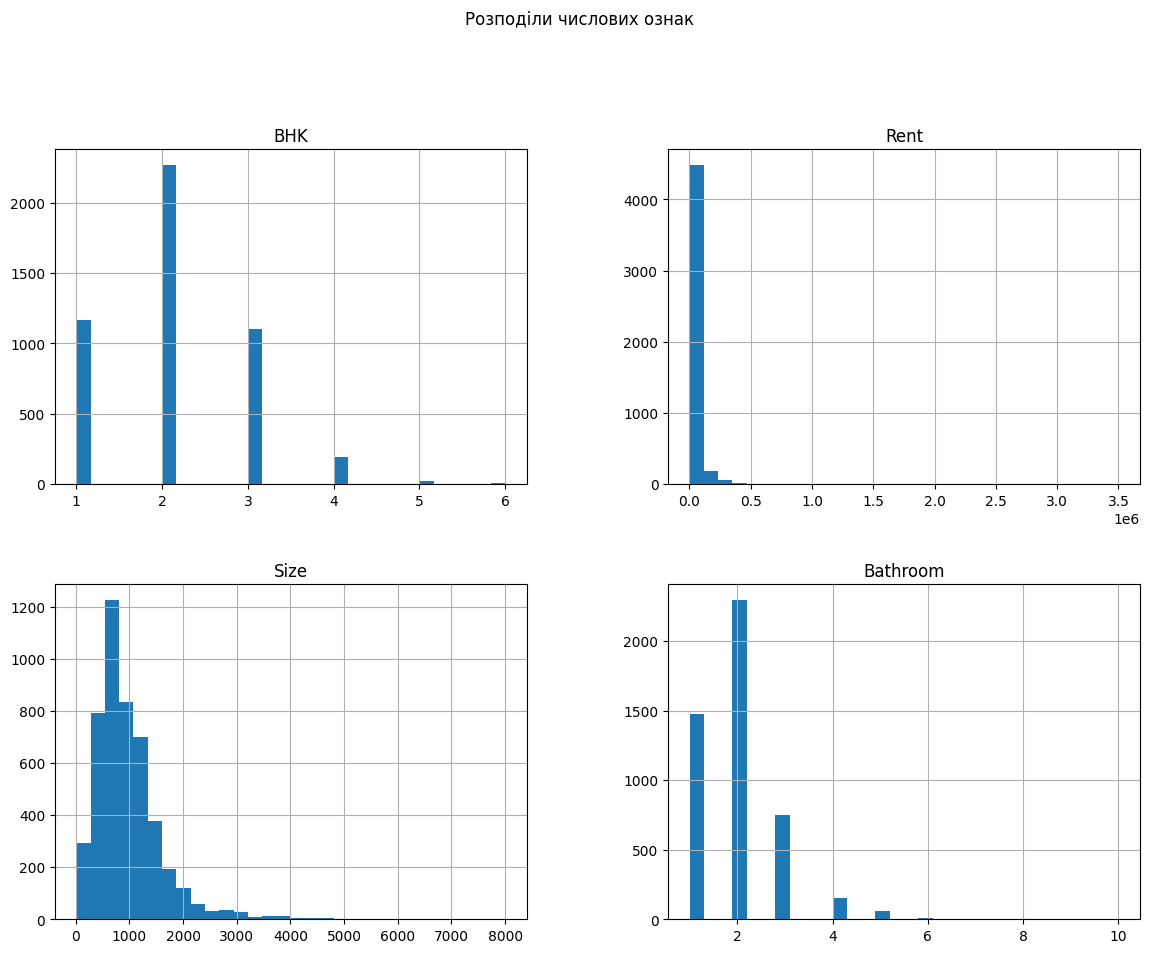

In [35]:
# --- 6. Візуалізація розподілів ---
if numeric_cols:
    df[numeric_cols].hist(figsize=(14, 10), bins=30)
    plt.suptitle("Розподіли числових ознак", y=1.02)
    plt.show()



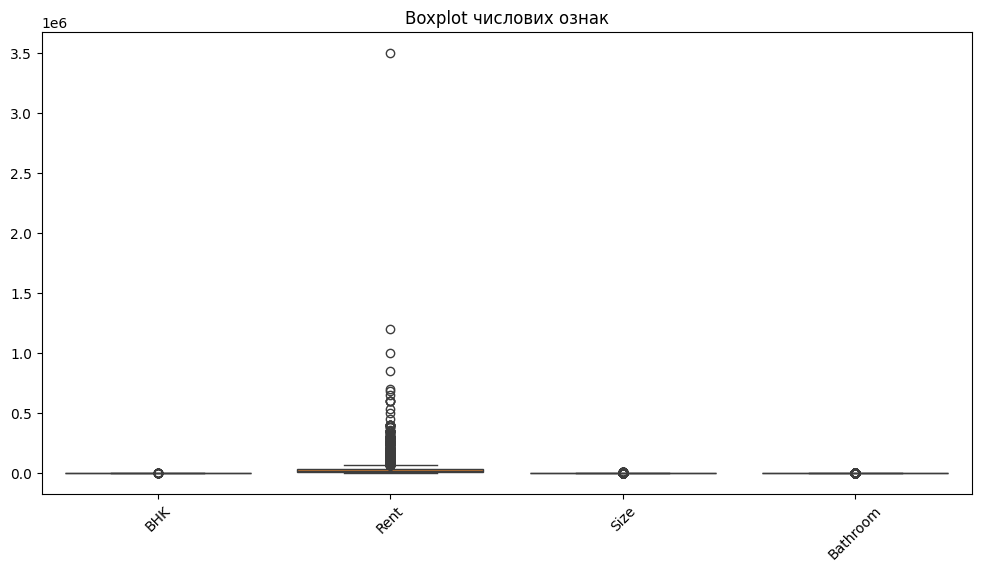

In [36]:
# Boxplot для виявлення викидів
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot числових ознак")
plt.xticks(rotation=45)
plt.show()




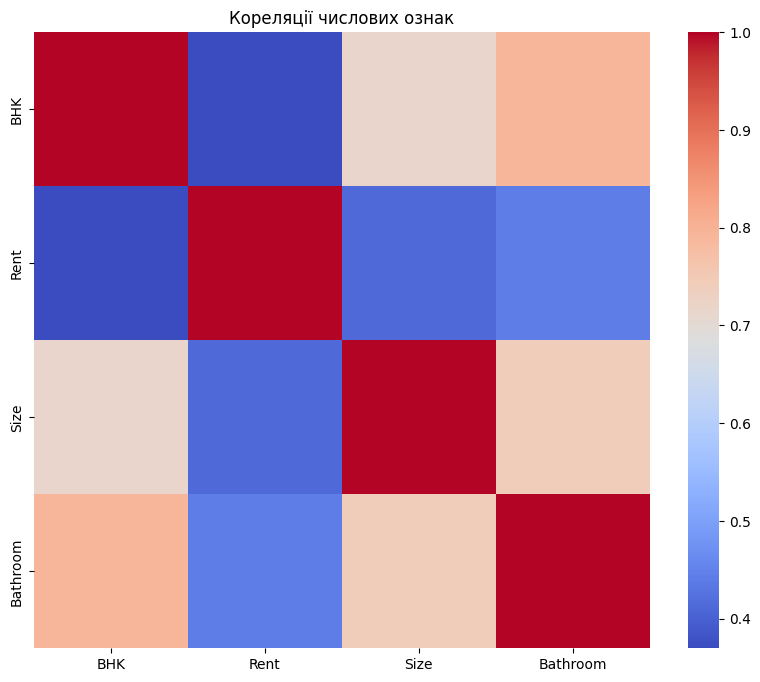


✅ Аналіз та базове чищення завершено


In [37]:
# --- 7. Кореляції ---
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    corr = df[numeric_cols].corr(numeric_only=True)
    sns.heatmap(corr, annot=False, cmap="coolwarm", square=True)
    plt.title("Кореляції числових ознак")
    plt.show()

print("\n✅ Аналіз та базове чищення завершено")

Частина 2. Моделювання

Створи як мінімум 2 різні регресійні моделі для прогнозування цільової змінної “Rent”. Оціни якість моделей як мінімум за 2 метриками.

In [77]:
# =========================
# PART 2: MODELING (robust)
# =========================
import re
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

df_model = df.copy()

# --- 1) Clean/engineer features ---

# a) Posted On -> datetime -> numeric (days since min date)
df_model["Posted On"] = pd.to_datetime(df_model["Posted On"], errors="coerce")
min_date = df_model["Posted On"].min()
df_model["days_since_posted"] = (df_model["Posted On"] - min_date).dt.days

# b) Floor -> floor_num, floor_total
def parse_floor(s):
    if pd.isna(s):
        return np.nan, np.nan
    s = str(s).strip()
    # patterns like "Ground out of 2" or "1 out of 3"
    parts = s.split(" out of ")
    if len(parts) == 2:
        cur_raw, tot_raw = parts
        cur_raw = cur_raw.strip().lower()
        if cur_raw in ["ground", "ground floor"]:
            cur = 0
        else:
            # keep only digits
            cur = pd.to_numeric(re.sub(r"\D", "", cur_raw), errors="coerce")
        tot = pd.to_numeric(re.sub(r"\D", "", tot_raw), errors="coerce")
        return cur, tot
    # fallback: just a number if present
    cur = pd.to_numeric(re.sub(r"\D", "", s), errors="coerce")
    return cur, np.nan

df_model[["floor_num", "floor_total"]] = df_model["Floor"].apply(
    lambda s: pd.Series(parse_floor(s))
)

# c) Ensure numeric columns are numeric
for col in ["BHK", "Size", "Bathroom", "Rent", "days_since_posted", "floor_num", "floor_total"]:
    df_model[col] = pd.to_numeric(df_model[col], errors="coerce")

# d) Drop raw columns we no longer need
drop_cols = ["Posted On", "Floor", "Point of Contact"]
df_model = df_model.drop(columns=drop_cols, errors="ignore")

# --- 2) Define features/target ---
y = df_model["Rent"]
X = df_model.drop(columns=["Rent"])

numeric_features = ["BHK", "Size", "Bathroom", "days_since_posted", "floor_num", "floor_total"]
# keep only those that actually exist after your cleaning
numeric_features = [c for c in numeric_features if c in X.columns]

categorical_features = [
    "Area Type", "Area Locality", "City", "Furnishing Status", "Tenant Preferred"
]
categorical_features = [c for c in categorical_features if c in X.columns]

# --- 3) Preprocessing pipelines ---
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"
)

# --- 4) Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("✅ Train:", X_train.shape, "| Test:", X_test.shape)

# --- 5) Evaluation helper ---
def evaluate_model(name, pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n=== {name} ===")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.3f}")
    return y_pred, {"MAE": mae, "RMSE": rmse, "R2": r2}

# --- 6) Models ---
linreg_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=300, random_state=42, n_jobs=-1
    ))
])

# --- 7) Train & evaluate ---
_ = evaluate_model("Linear Regression", linreg_pipe, X_train, y_train, X_test, y_test)
_ = evaluate_model("Random Forest", rf_pipe, X_train, y_train, X_test, y_test)


✅ Train: (3796, 11) | Test: (950, 11)

=== Linear Regression ===
MAE:  21748.12
RMSE: 64493.87
R²:   -0.044

=== Random Forest ===
MAE:  12268.09
RMSE: 47663.89
R²:   0.430


Частина 3. Аналіз результатів Для всіх моделей побудуй графіки порівняння справжніх та спрогнозованих даних. Зроби висновки, на яких прикладах кожна модель більше помиляється. Зроби порівняння якості моделей. Напиши висновки.

In [91]:
# =========================
# PART 3: COLORFUL RE-PLOTS (add-on; do not change code above)
# =========================
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

# Яскрава палітра
palette = [
    "#3366FF",  # primary blue
    "#FF6B00",  # vivid orange
    "#10B981",  # emerald
    "#EF4444",  # red
    "#8B5CF6",  # violet
    "#F59E0B",  # amber
    "#06B6D4",  # cyan
    "#22C55E",  # green
    "#E11D48",  # rose
    "#9333EA",  # purple
]

mpl.rcParams["axes.prop_cycle"] = cycler(color=palette)
mpl.rcParams["figure.dpi"] = 140
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.alpha"] = 0.2
mpl.rcParams["axes.edgecolor"] = "#64748b"
mpl.rcParams["axes.labelcolor"] = "#0f172a"
mpl.rcParams["xtick.color"] = "#334155"
mpl.rcParams["ytick.color"] = "#334155"
mpl.rcParams["lines.linewidth"] = 2.0

PRIMARY   = palette[0]
ACCENT    = palette[3]
SECONDARY = palette[2]

# Кольорові версії твоїх графіків (нові функції, не замінюють твої)
def parity_plot(y_true, y_pred, title):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mn = float(np.nanmin([y_true.min(), y_pred.min()]))
    mx = float(np.nanmax([y_true.max(), y_pred.max()]))
    plt.figure(figsize=(7,7))
    plt.scatter(y_true, y_pred, alpha=0.5, s=28, color=PRIMARY, edgecolor="white", linewidth=0.3)
    plt.plot([mn, mx], [mn, mx], linestyle="--", color=ACCENT, linewidth=1.8)
    plt.xlabel("Справжня орендна ставка (y_true)")
    plt.ylabel("Прогнозована орендна ставка (y_pred)")
    plt.title(title + " — colored")
    plt.tight_layout()
    plt.show()

def residual_plot(y_true, y_pred, title):
    resid = np.asarray(y_pred, dtype=float) - np.asarray(y_true, dtype=float)
    plt.figure(figsize=(8,5))
    plt.scatter(y_pred, resid, alpha=0.5, s=26, color=SECONDARY, edgecolor="white", linewidth=0.3)
    plt.axhline(0, linestyle="--", color=ACCENT, linewidth=1.6)
    plt.xlabel("Прогнозована орендна ставка")
    plt.ylabel("Резидуал (pred - true)")
    plt.title(title + " — colored")
    plt.tight_layout()
    plt.show()

def error_hist(abs_errors, title, color=PRIMARY):
    plt.figure(figsize=(8,5))
    plt.hist(abs_errors, bins=30, color=color, edgecolor="white", alpha=0.85)
    plt.xlabel("Абсолютна помилка")
    plt.ylabel("Кількість прикладів")
    plt.title(title + " — colored")
    plt.tight_layout()
    plt.show()

# # Перемальовуємо для обох моделей (на основі вже обчисленого res)
# parity_plot_colored(res["y_true"], res["pred_lin"], "Parity plot: Linear Regression")
# residual_plot_colored(res["y_true"], res["pred_lin"], "Residuals: Linear Regression")
# error_hist_colored(res["abs_err_lin"], "Distribution of |error|: Linear Regression", color=palette[1])

# parity_plot_colored(res["y_true"], res["pred_rf"], "Parity plot: Random Forest")
# residual_plot_colored(res["y_true"], res["pred_rf"], "Residuals: Random Forest")
# error_hist_colored(res["abs_err_rf"], "Distribution of |error|: Random Forest", color=palette[4])

# # (необов’язково) кольорова важливість ознак, якщо fi вже є з твого коду вище
# try:
#     fi  # перевірка, що таблиця важливостей існує
#     cm = plt.cm.get_cmap("viridis")
#     n  = len(fi)
#     colors = cm(np.linspace(0.25, 0.95, n))
#     plt.figure(figsize=(9,6))
#     plt.barh(fi["feature"][::-1], fi["importance"][::-1], color=colors[::-1], edgecolor="white")
#     plt.xlabel("Важливість")
#     plt.title("Top-20 важливих ознак (Random Forest) — colored")
#     plt.tight_layout()
#     plt.show()
# except NameError:
#     pass


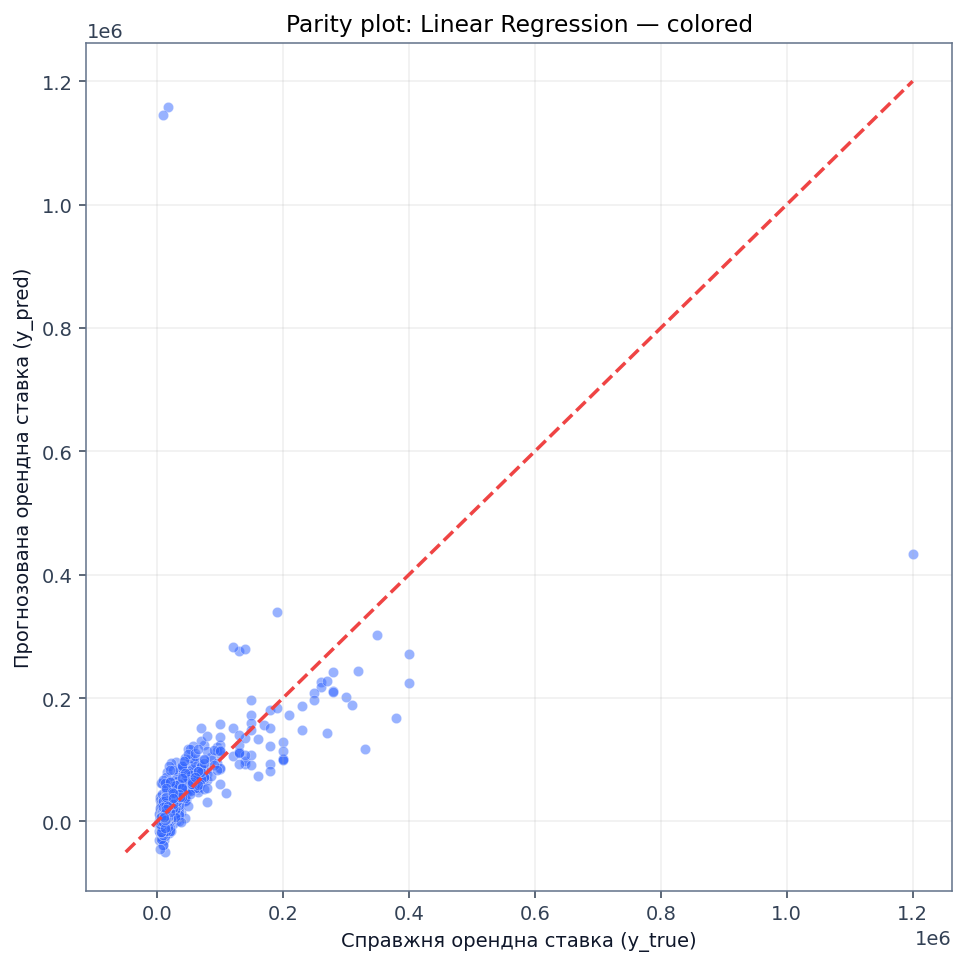

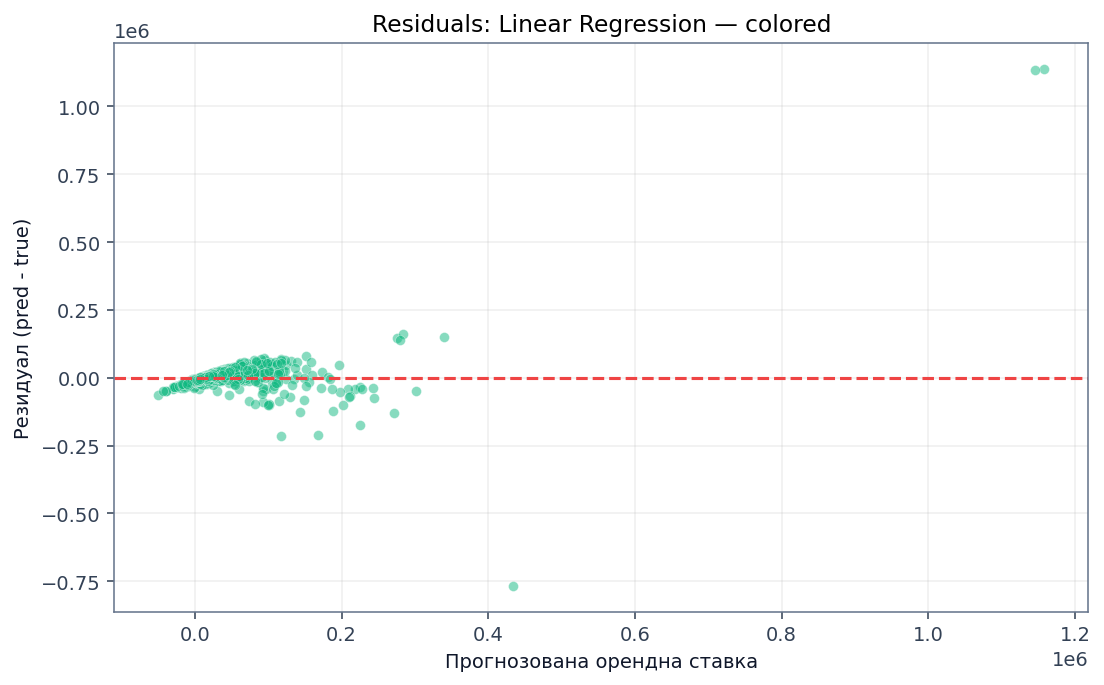

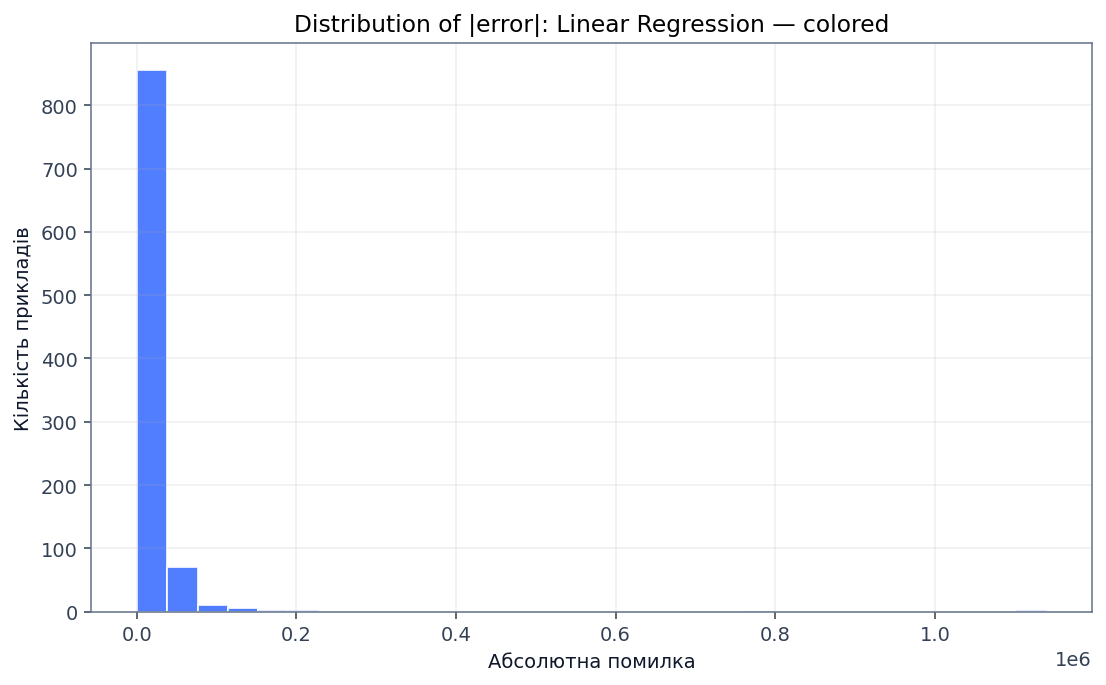

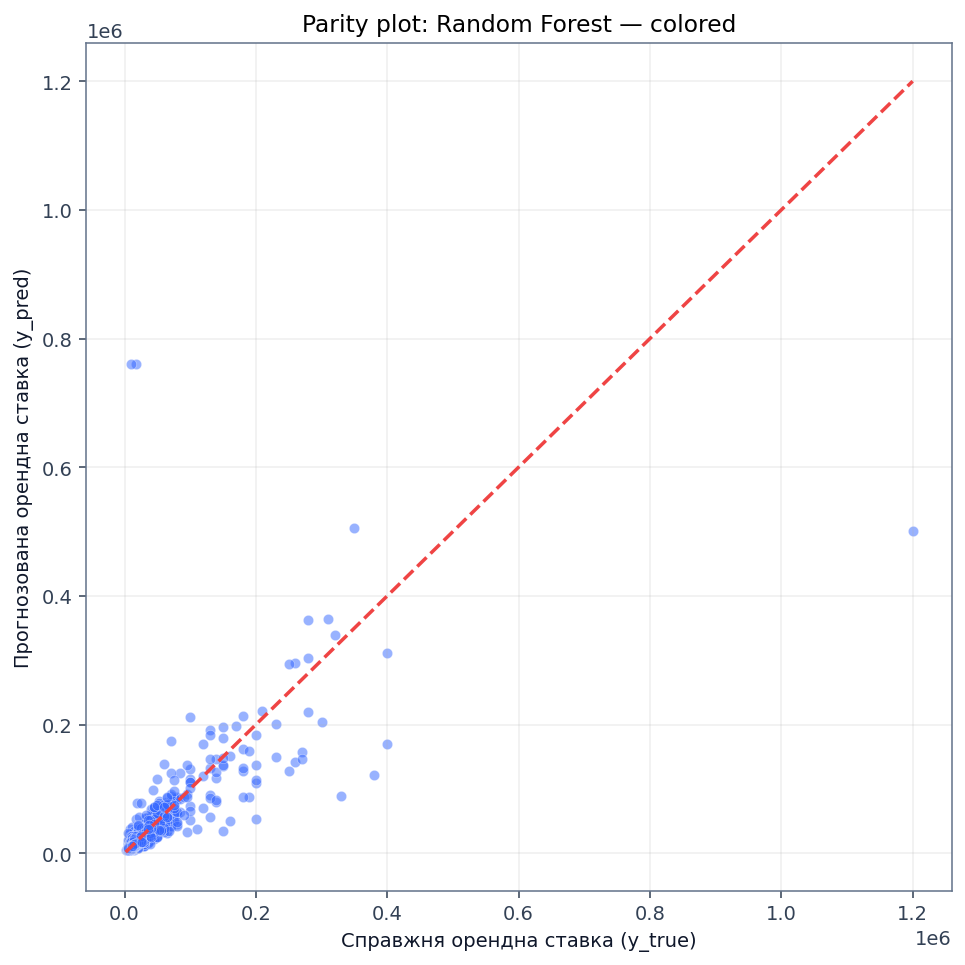

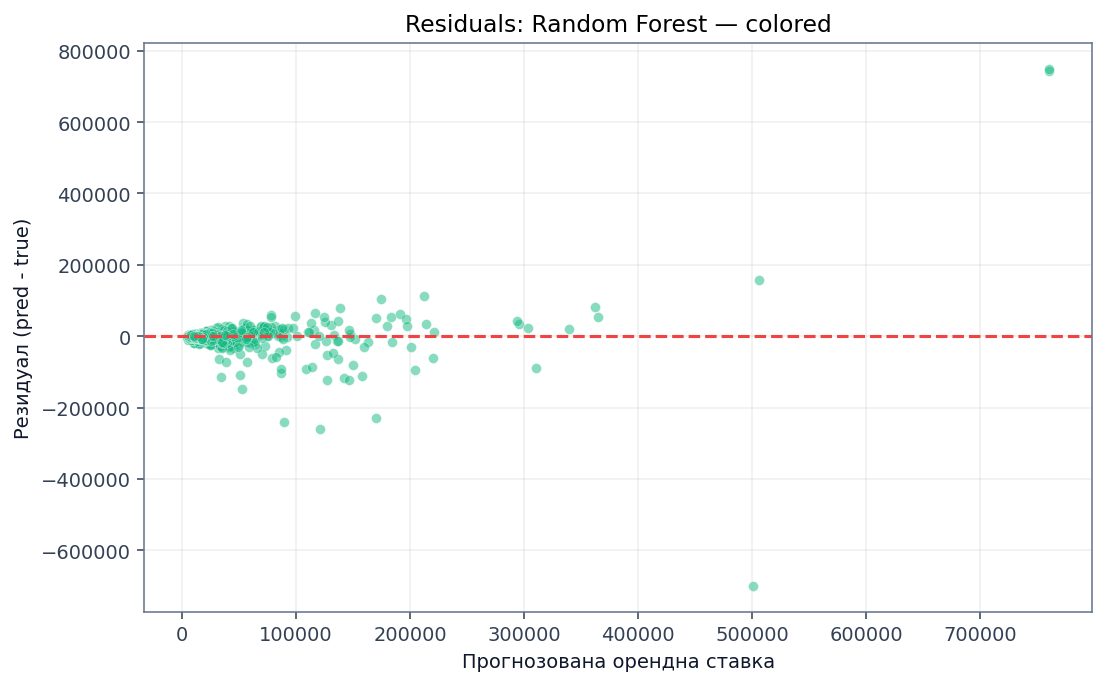

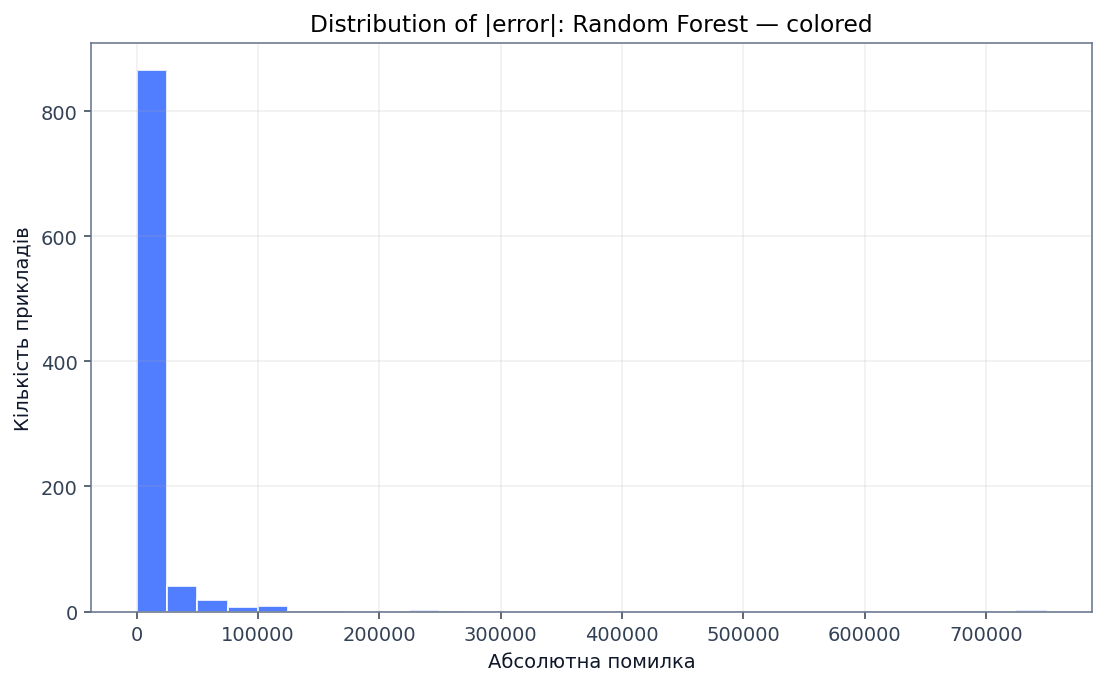

Приклади, де моделі найбільше помиляються

=== TOP 10 помилок: Linear Regression ===


,y_true,pred_lin,pred_rf,abs_err_lin,abs_err_rf,BHK,Size,Bathroom,City,Furnishing Status,Area Locality,days_since_posted,floor_num,floor_total,Area Type,Tenant Preferred
60,18000,1.157923e+06,760062.666667,1.139923e+06,742062.666667,2,600,2,Bangalore,Unfurnished,Marathahalli,40,0.0,2.0,Super Area,Bachelors/Family
498,10000,1.145452e+06,759854.333333,1.135452e+06,749854.333333,2,500,1,Bangalore,Unfurnished,Marathahalli,40,NaN,4.0,Carpet Area,Bachelors/Family
348,1200000,4.335708e+05,500733.333333,7.664292e+05,699266.666667,4,5000,4,Mumbai,Semi-Furnished,Juhu,49,4.0,15.0,Carpet Area,Bachelors/Family
380,330000,1.169433e+05,89036.666667,2.130567e+05,240963.333333,3,3600,3,Chennai,Semi-Furnished,Madras Boat Club Road,62,3.0,4.0,Carpet Area,Bachelors/Family
294,380000,1.675154e+05,121046.666667,2.124846e+05,258953.333333,4,3500,5,Bangalore,Semi-Furnished,Lavelle Road,77,2.0,4.0,Carpet Area,Bachelors
8,400000,2.247115e+05,310500.000000,1.752885e+05,89500.000000,4,2500,4,Mumbai,Furnished,Bandra West,70,5.0,12.0,Carpet Area,Bachelors/Family
744,120000,2.831511e+05,120156.666667,1.631511e+05,156.666667,3,1200,3,Mumbai,Furnished,Khar West,73,10.0,14.0,Carpet Area,Bachelors/Family
471,190000,3.402915e+05,86842.000000,1.502915e+05,103158.000000,2,895,2,Mumbai,Semi-Furnished,"Indiabulls Blu, Worli",87,32.0,46.0,Carpet Area,Bachelors/Family
129,130000,2.756356e+05,132944.996667,1.456356e+05,2944.996667,2,1000,2,Mumbai,Furnished,Khar West,36,10.0,12.0,Carpet Area,Bachelors
896,140000,2.798770e+05,82098.333333,1.398770e+05,57901.666667,3,1000,3,Mumbai,Semi-Furnished,Juhu,78,3.0,7.0,Carpet Area,Family



=== TOP 10 помилок: Random Forest ===


,y_true,pred_lin,pred_rf,abs_err_lin,abs_err_rf,BHK,Size,Bathroom,City,Furnishing Status,Area Locality,days_since_posted,floor_num,floor_total,Area Type,Tenant Preferred
498,10000,1.145452e+06,759854.333333,1.135452e+06,749854.333333,2,500,1,Bangalore,Unfurnished,Marathahalli,40,NaN,4.0,Carpet Area,Bachelors/Family
60,18000,1.157923e+06,760062.666667,1.139923e+06,742062.666667,2,600,2,Bangalore,Unfurnished,Marathahalli,40,0.0,2.0,Super Area,Bachelors/Family
348,1200000,4.335708e+05,500733.333333,7.664292e+05,699266.666667,4,5000,4,Mumbai,Semi-Furnished,Juhu,49,4.0,15.0,Carpet Area,Bachelors/Family
294,380000,1.675154e+05,121046.666667,2.124846e+05,258953.333333,4,3500,5,Bangalore,Semi-Furnished,Lavelle Road,77,2.0,4.0,Carpet Area,Bachelors
380,330000,1.169433e+05,89036.666667,2.130567e+05,240963.333333,3,3600,3,Chennai,Semi-Furnished,Madras Boat Club Road,62,3.0,4.0,Carpet Area,Bachelors/Family
822,400000,2.719134e+05,170080.000000,1.280866e+05,229920.000000,4,7000,6,Hyderabad,Semi-Furnished,Jubilee Hills,84,NaN,2.0,Carpet Area,Bachelors/Family
48,350000,3.015112e+05,506066.666667,4.848877e+04,156066.666667,4,3000,5,Mumbai,Semi-Furnished,"Lodha World Crest, Lower Parel",31,39.0,60.0,Carpet Area,Bachelors/Family
612,200000,9.948355e+04,52703.333333,1.005165e+05,147296.666667,4,2300,4,Delhi,Semi-Furnished,Shanti Niketan,58,1.0,1.0,Super Area,Bachelors/Family
595,270000,1.436486e+05,146346.666667,1.263514e+05,123653.333333,4,1649,3,Mumbai,Semi-Furnished,"Adani Western Heights, Andheri West",85,18.0,29.0,Carpet Area,Family
438,250000,1.976365e+05,127253.333333,5.236347e+04,122746.666667,4,3500,4,Chennai,Semi-Furnished,"Poes Garden, Teynampet",84,1.0,4.0,Carpet Area,Bachelors/Family



=== MAE по групах: ['BHK'] ===


,n,mae_lin,mae_rf
BHK,,,
2,465,18649.880288,9584.729336
1,237,16538.531010,4143.288533
3,205,24439.826137,14938.801561
4,42,69937.087421,73775.551429



=== MAE по групах: ['City'] ===


,n,mae_lin,mae_rf
City,,,
Mumbai,199,34147.693877,24792.164824
Hyderabad,185,17018.695373,5367.849071
Chennai,174,16672.440758,7932.682605
Bangalore,158,29408.698686,16633.289641
Kolkata,118,10808.593743,3373.014642
Delhi,116,16326.458216,11393.369490



=== MAE по групах: ['Furnishing Status'] ===


,n,mae_lin,mae_rf
Furnishing Status,,,
Semi-Furnished,450,21270.726214,13175.542188
Unfurnished,358,21425.135391,9434.657678
Furnished,142,24075.258863,16535.806831



=== MAE по групах: ['Area Type'] ===


,n,mae_lin,mae_rf
Area Type,,,
Super Area,488,17893.090188,7400.540560
Carpet Area,462,25820.095266,17409.571883



=== Найважливіші ознаки (Random Forest, top-20) ===


,feature,importance
2,Bathroom,0.258859
1059,Area Locality_Marathahalli,0.175302
1,Size,0.175111
1932,City_Mumbai,0.108619
3,days_since_posted,0.032764
5,floor_total,0.031540
0,BHK,0.030040
4,floor_num,0.025813
1936,Tenant Preferred_Bachelors,0.018880
1392,"Area Locality_Raheja Artesia, Worli",0.017462


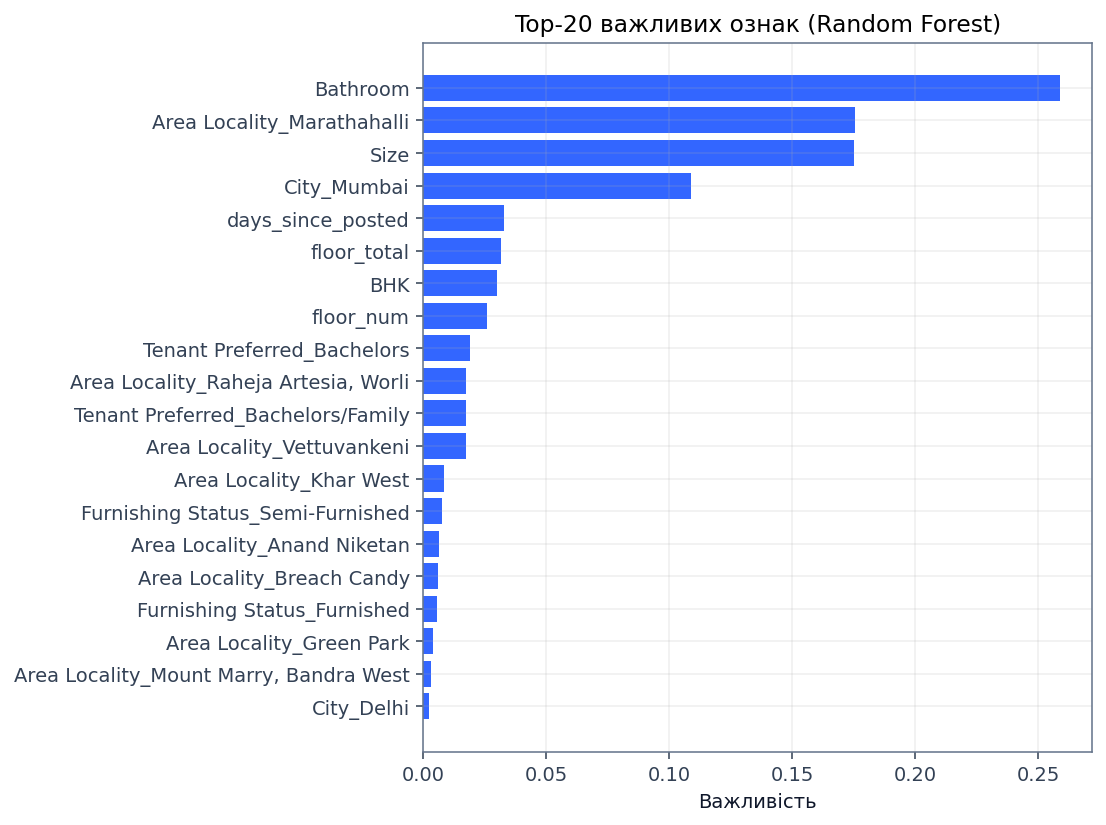


=== Автовисновки ===
Краще за RMSE: RandomForest
Краще за MAE:  RandomForest
Додатково подивись на parity/residual-графіки: чи є систематичні зміщення або хвости.


In [92]:
# =========================
# PART 3: ANALYSIS
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0) На всяк випадок донавчимо пайплайни (якщо ти вже їх навчила — це harmless)
# linreg_pipe.fit(X_train, y_train)
# rf_pipe.fit(X_train, y_train)

# 1) Прогнози + таблиця помилок
pred_lin = linreg_pipe.predict(X_test)
pred_rf  = rf_pipe.predict(X_test)

res = pd.DataFrame({
    "y_true": y_test.reset_index(drop=True),
    "pred_lin": pred_lin,
    "pred_rf": pred_rf
})
res["err_lin"] = res["pred_lin"] - res["y_true"]
res["err_rf"]  = res["pred_rf"]  - res["y_true"]
res["abs_err_lin"] = res["err_lin"].abs()
res["abs_err_rf"]  = res["err_rf"].abs()

# # 2) Порівняльні метрики
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# def metrics(y_true, y_pred):
#     mae  = mean_absolute_error(y_true, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_true, y_pred))
#     r2   = r2_score(y_true, y_pred)
#     return pd.Series({"MAE": mae, "RMSE": rmse, "R2": r2})

summary = pd.DataFrame({
    "LinearRegression": metrics(res["y_true"], res["pred_lin"]),
    "RandomForest":     metrics(res["y_true"], res["pred_rf"])
})
# print("=== METRICS ===")
# display(summary)

# 3) Функції візуалізації
# def parity_plot(y_true, y_pred, title):
#     mn = min(y_true.min(), y_pred.min())
#     mx = max(y_true.max(), y_pred.max())
#     plt.figure(figsize=(6,6))
#     plt.scatter(y_true, y_pred, alpha=0.6, s=24)
#     plt.plot([mn, mx], [mn, mx], linestyle="--")
#     plt.xlabel("Справжня орендна ставка (y_true)")
#     plt.ylabel("Прогнозована орендна ставка (y_pred)")
#     plt.title(title)
#     plt.tight_layout()
#     plt.show()

# def residual_plot(y_true, y_pred, title):
#     resid = y_pred - y_true
#     plt.figure(figsize=(7,5))
#     plt.scatter(y_pred, resid, alpha=0.6, s=20)
#     plt.axhline(0, linestyle="--")
#     plt.xlabel("Прогнозована орендна ставка")
#     plt.ylabel("Резидуал (pred - true)")
#     plt.title(title)
#     plt.tight_layout()
#     plt.show()

# def error_hist(abs_errors, title):
#     plt.figure(figsize=(7,5))
#     plt.hist(abs_errors, bins=30)
#     plt.xlabel("Абсолютна помилка")
#     plt.ylabel("Кількість прикладів")
#     plt.title(title)
#     plt.tight_layout()
#     plt.show()

# 4) Графіки для кожної моделі
parity_plot(res["y_true"], res["pred_lin"], "Parity plot: Linear Regression")
residual_plot(res["y_true"], res["pred_lin"], "Residuals: Linear Regression")
error_hist(res["abs_err_lin"], "Distribution of |error|: Linear Regression")

parity_plot(res["y_true"], res["pred_rf"], "Parity plot: Random Forest")
residual_plot(res["y_true"], res["pred_rf"], "Residuals: Random Forest")
error_hist(res["abs_err_rf"], "Distribution of |error|: Random Forest")

# 5) Приклади, де моделі найбільше помиляються
# Витягнемо сирі фічі для тестового піднабору (за індексами X_test)
print("Приклади, де моделі найбільше помиляються")
test_raw = df_model.loc[X_test.index].reset_index(drop=True)

# Додамо помилки
analysed = pd.concat([test_raw.reset_index(drop=True), res.reset_index(drop=True)], axis=1)

# Які колонки показувати в топ-помилках
cols_hint = [
    "y_true","pred_lin","pred_rf","abs_err_lin","abs_err_rf",
    "BHK","Size","Bathroom","City","Furnishing Status","Area Locality",
    "days_since_posted","floor_num","floor_total","Area Type","Tenant Preferred"
]
cols_present = [c for c in cols_hint if c in analysed.columns]

topk = 10
print(f"\n=== TOP {topk} помилок: Linear Regression ===")
display(analysed.sort_values("abs_err_lin", ascending=False)[cols_present].head(topk))

print(f"\n=== TOP {topk} помилок: Random Forest ===")
display(analysed.sort_values("abs_err_rf", ascending=False)[cols_present].head(topk))

# 6) У яких групах модель помиляється більше? (MAE по категоріях/бінінгу)
def group_mae(df, by, min_n=5):
    g = df.groupby(by, dropna=False).agg(
        n=("y_true", "size"),
        mae_lin=("abs_err_lin", "mean"),
        mae_rf=("abs_err_rf", "mean")
    ).sort_values("n", ascending=False)
    return g[g["n"] >= min_n]

# Спробуємо кілька зрізів (враховуємо, що колонок може не бути)
for by in [["BHK"], ["City"], ["Furnishing Status"], ["Area Type"]]:
    if all(col in analysed.columns for col in by):
        print(f"\n=== MAE по групах: {by} ===")
        display(group_mae(analysed, by, min_n=3).head(20))

# 7) Важливість ознак для Random Forest (top-20)
# (список імен ознак з ColumnTransformer + OHE)
try:
    preprocess = rf_pipe.named_steps["preprocess"]
    feat_names = []
    for name, trans, cols in preprocess.transformers_:
        if name == "num":
            feat_names.extend(cols)
        elif name == "cat":
            ohe = trans.named_steps["onehot"]
            feat_names.extend(ohe.get_feature_names_out(cols))

    importances = rf_pipe.named_steps["model"].feature_importances_
    fi = pd.DataFrame({"feature": feat_names, "importance": importances}) \
            .sort_values("importance", ascending=False) \
            .head(20)
    print("\n=== Найважливіші ознаки (Random Forest, top-20) ===")
    display(fi)

    # Барчарт
    plt.figure(figsize=(8,6))
    plt.barh(fi["feature"][::-1], fi["importance"][::-1])
    plt.xlabel("Важливість")
    plt.title("Top-20 важливих ознак (Random Forest)")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Не вдалося побудувати важливість ознак:", e)

# 8) Автоматичні короткі висновки за метриками
best_by_rmse = "RandomForest" if summary.loc["RMSE","RandomForest"] < summary.loc["RMSE","LinearRegression"] else "LinearRegression"
best_by_mae  = "RandomForest" if summary.loc["MAE","RandomForest"]  < summary.loc["MAE","LinearRegression"] else "LinearRegression"
print("\n=== Автовисновки ===")
print(f"Краще за RMSE: {best_by_rmse}")
print(f"Краще за MAE:  {best_by_mae}")
print("Додатково подивись на parity/residual-графіки: чи є систематичні зміщення або хвости.")


ValueError: zero-size array to reduction operation minimum which has no identity

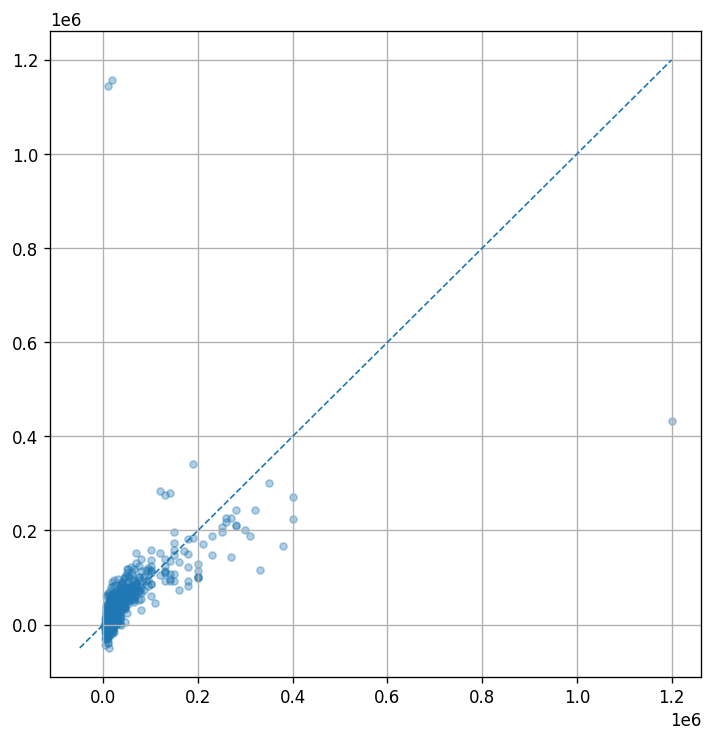

In [86]:
# =========================
# PART 3: ADVANCED PLOTS (add-on, no code changes above)
# =========================
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams["figure.dpi"] = 120
plt.rcParams["axes.grid"] = True

# --- helpers ---
def _dropna_pair(a, b):
    m = np.isfinite(a) & np.isfinite(b)
    return a[m], b[m]

def binned_parity_plot(y_true, y_pred, title, bins=12, qlow=0.1, qhi=0.9):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    y_true, y_pred = _dropna_pair(y_true, y_pred)

    # базовий scatter + лінія y=x
    mn = float(min(y_true.min(), y_pred.min()))
    mx = float(max(y_true.max(), y_pred.max()))
    plt.figure(figsize=(7,7))
    plt.scatter(y_true, y_pred, alpha=0.35, s=18)
    plt.plot([mn, mx], [mn, mx], linestyle="--", linewidth=1)

    # бінінг за y_true: усереднення і квантилі прогнозів
    edges = np.quantile(y_true, np.linspace(0, 1, bins + 1))
    centers, mean_pred, qlo, qhi = [], [], [], []
    for i in range(bins):
        mask = (y_true >= edges[i]) & (y_true <= edges[i+1] if i == bins-1 else y_true < edges[i+1])
        if not np.any(mask):
            continue
        centers.append(np.mean(y_true[mask]))
        yp = y_pred[mask]
        mean_pred.append(np.mean(yp))
        qlo.append(np.quantile(yp, qlow))
        qhi.append(np.quantile(yp, qhi))

    centers = np.array(centers)
    mean_pred = np.array(mean_pred)
    qlo = np.array(qlo)
    qhi = np.array(qhi)

    # лінія усереднень + «віяло» невизначеності (10–90 перцентиль)
    plt.plot(centers, mean_pred, linewidth=2)
    plt.fill_between(centers, qlo, qhi, alpha=0.2, linewidth=0)

    plt.xlabel("Справжня орендна ставка (y)")
    plt.ylabel("Прогнозована оренда (ŷ)")
    plt.title(title)
    plt.tight_layout()
    plt.show()


def calibration_by_prediction(y_true, y_pred, title, bins=10):
    """Регресійна калібрувальна крива: середні y_true vs середні y_pred у бінів за ŷ."""
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    y_true, y_pred = _dropna_pair(y_true, y_pred)

    edges = np.quantile(y_pred, np.linspace(0, 1, bins + 1))
    x_mean, y_mean = [], []
    for i in range(bins):
        mask = (y_pred >= edges[i]) & (y_pred <= edges[i+1] if i == bins-1 else y_pred < edges[i+1])
        if not np.any(mask):
            continue
        x_mean.append(np.mean(y_pred[mask]))
        y_mean.append(np.mean(y_true[mask]))

    x_mean = np.array(x_mean)
    y_mean = np.array(y_mean)

    mn = float(min(x_mean.min(), y_mean.min()))
    mx = float(max(x_mean.max(), y_mean.max()))
    plt.figure(figsize=(7,6))
    plt.plot([mn, mx], [mn, mx], linestyle="--", linewidth=1)
    plt.plot(x_mean, y_mean, marker="o", linewidth=2)
    plt.xlabel("Середній прогноз у біні (ŷ)")
    plt.ylabel("Середнє істинне значення у біні (y)")
    plt.title(title + " — калібрування за прогнозом")
    plt.tight_layout()
    plt.show()


def cdf_abs_error(e1, e2, labels=("Model A", "Model B"), title="Кумулятивний розподіл |помилки|"):
    """Порівняння CDF абсолютних помилок двох моделей (чим вище — тим краще)."""
    e1 = np.asarray(e1, dtype=float)
    e2 = np.asarray(e2, dtype=float)
    e1 = e1[np.isfinite(e1)]
    e2 = e2[np.isfinite(e2)]

    x1 = np.sort(np.abs(e1))
    x2 = np.sort(np.abs(e2))
    y1 = np.linspace(0, 1, len(x1), endpoint=True)
    y2 = np.linspace(0, 1, len(x2), endpoint=True)

    plt.figure(figsize=(7,5))
    plt.plot(x1, y1, label=labels[0])
    plt.plot(x2, y2, label=labels[1])
    plt.xlabel("|помилка|")
    plt.ylabel("CDF")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


def mae_by_decile(y_true, e_lin, e_rf, title="MAE по децилях (за y)"):
    """MAE моделей у децилях істинного значення — де складніше, там MAE більше."""
    y_true = np.asarray(y_true, dtype=float)
    e_lin = np.asarray(e_lin, dtype=float)
    e_rf  = np.asarray(e_rf, dtype=float)

    mask = np.isfinite(y_true) & np.isfinite(e_lin) & np.isfinite(e_rf)
    y_true, e_lin, e_rf = y_true[mask], e_lin[mask], e_rf[mask]

    dec = np.clip(np.digitize(y_true, np.quantile(y_true, np.linspace(0,1,11))), 1, 10)
    mae_lin, mae_rf = [], []
    xs = []
    for d in range(1, 11):
        m = dec == d
        if not np.any(m):
            mae_lin.append(np.nan); mae_rf.append(np.nan); xs.append(d)
            continue
        mae_lin.append(np.mean(np.abs(e_lin[m])))
        mae_rf.append(np.mean(np.abs(e_rf[m])))
        xs.append(d)

    xs = np.array(xs)
    width = 0.35
    plt.figure(figsize=(8,5))
    plt.bar(xs - width/2, mae_lin, width, label="LinearRegression")
    plt.bar(xs + width/2, mae_rf,  width, label="RandomForest")
    plt.xticks(xs, [f"D{d}" for d in xs])
    plt.xlabel("Децилі y (низька → висока оренда)")
    plt.ylabel("MAE")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


def qq_residuals(residuals, title):
    """QQ-плот для перевірки нормальності залишків."""
    residuals = np.asarray(residuals, dtype=float)
    residuals = residuals[np.isfinite(residuals)]
    plt.figure(figsize=(6,6))
    (osm, osr), (slope, intercept, r) = stats.probplot(residuals, dist="norm")
    plt.scatter(osm, osr, s=16, alpha=0.6)
    plt.plot(osm, slope*osm + intercept, linestyle="--", linewidth=1)
    plt.xlabel("Теоретичні квантилі (N(0,1))")
    plt.ylabel("Спостережувані квантилі залишків")
    plt.title(title + f" (R≈{r:.3f})")
    plt.tight_layout()
    plt.show()


def rank_order_plot(y_true, y_pred_a, y_pred_b, labels=("Model A","Model B"), title="Ранжування: y vs ŷ"):
    """Сортуємо за y і накладаємо криві y, ŷ_A, ŷ_B — видно тренд і де розходиться."""
    y_true = np.asarray(y_true, dtype=float)
    y_pred_a = np.asarray(y_pred_a, dtype=float)
    y_pred_b = np.asarray(y_pred_b, dtype=float)

    mask = np.isfinite(y_true) & np.isfinite(y_pred_a) & np.isfinite(y_pred_b)
    y_true, y_pred_a, y_pred_b = y_true[mask], y_pred_a[mask], y_pred_b[mask]

    order = np.argsort(y_true)
    yt = y_true[order]
    ya = y_pred_a[order]
    yb = y_pred_b[order]

    plt.figure(figsize=(9,5))
    plt.plot(yt, linewidth=2, label="y (істинне)")
    plt.plot(ya, linewidth=1.5, label=labels[0])
    plt.plot(yb, linewidth=1.5, label=labels[1])
    plt.xlabel("Індекс (від найнижчої до найвищої ціни)")
    plt.ylabel("Орендна ставка")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


# --- build residuals/abs errors from your existing 'res' ---
err_lin = (res["pred_lin"] - res["y_true"]).to_numpy()
err_rf  = (res["pred_rf"]  - res["y_true"]).to_numpy()
abs_lin = np.abs(err_lin)
abs_rf  = np.abs(err_rf)

# 1) Розширений parity з бінінгом і «віялом» квантилів
binned_parity_plot(res["y_true"], res["pred_lin"], "Parity (з бінінгом): Linear Regression")
binned_parity_plot(res["y_true"], res["pred_rf"],  "Parity (з бінінгом): Random Forest")

# 2) Калібрувальні криві (усереднення y у бінів за ŷ)
calibration_by_prediction(res["y_true"], res["pred_lin"], "Linear Regression")
calibration_by_prediction(res["y_true"], res["pred_rf"],  "Random Forest")

# 3) Кумулятивний розподіл абсолютних помилок: хто частіше дає менший |error|
cdf_abs_error(abs_lin, abs_rf, labels=("LinearRegression","RandomForest"))

# 4) MAE по децилях (за істинним y) — де моделі фейляться найбільше
mae_by_decile(res["y_true"], err_lin, err_rf)

# 5) QQ-плоти залишків
qq_residuals(err_lin, "QQ залишків — Linear Regression")
qq_residuals(err_rf,  "QQ залишків — Random Forest")

# 6) Ранжування: накладення y, ŷ_lin та ŷ_rf після сортування за y
rank_order_plot(res["y_true"], res["pred_lin"], res["pred_rf"],
                labels=("LinearRegression","RandomForest"),
                title="Ранжування: істинні значення vs прогнози")
